# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


numpy.ndarray

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

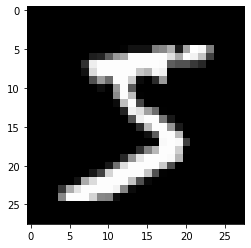

In [33]:
img=X[0].reshape(28,28)
plt.imshow(img, cmap="gray")

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
class_names = ['0','1','2','3','4','5','6','7','8','9']
n_classes = len(class_names)

10

### Naive Bayes

In [22]:
%%time
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_pred = clf_NB.predict(X_train)
print("accuracy GaussianNB:", accuracy_score(y_train, y_pred))
#plot_confusion_matrix(clf_NB, X_train, y_train,
#                                 display_labels=class_names,
#                                 cmap=plt.cm.Blues,
#                                 normalize=normalize)
confusion_matrix(y_train, y_pred)

accuracy GaussianNB: 0.5571666666666667
Wall time: 6.78 s


array([[5319,    9,   32,   20,    9,   13,  187,    2,  209,  120],
       [   2, 6327,   15,   28,    3,   12,   83,    2,  169,   84],
       [ 498,  149, 1913,  373,   19,   29, 1549,   20, 1365,  108],
       [ 363,  292,   56, 2186,    8,   14,  340,   47, 2093,  708],
       [ 162,   35,   49,   35,  821,   46,  601,   32, 1220, 2917],
       [ 635,  131,   31,  121,   21,  262,  312,   11, 3243,  609],
       [  49,   90,   30,    2,    4,   23, 5592,    0,  118,    7],
       [  25,   41,   10,   53,   42,    8,   21, 1803,  190, 4045],
       [  93,  719,   32,   45,   14,   34,  103,    9, 3583, 1224],
       [  34,   33,   14,   10,   27,    6,    4,   76,   94, 5624]],
      dtype=int64)

### Simple linar model

In [19]:
%%time
from sklearn.linear_model import SGDClassifier
clf_SL = SGDClassifier(max_iter = 10, loss='log')
clf_SL.fit(X_train, y_train)
y_pred = clf_SL.predict(X_train)
print('accuracy Simple linar model:', accuracy_score(y_train, y_pred))
confusion_matrix(y_train, y_pred)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


accuracy Simple linar model: 0.8759166666666667
Wall time: 11.9 s


array([[5153,    1,  163,   12,   10,  284,   54,    4,  236,    3],
       [   0, 6119,  154,    2,   10,   26,    4,   11,  342,   57],
       [   3,    7, 5664,   26,   71,   36,   25,   50,  134,    7],
       [  10,    7,  655, 4671,   12,  405,   18,   59,  184,   86],
       [   1,   10,   59,    1, 5272,   34,   32,   16,  185,  308],
       [  15,    8,   86,  121,   46, 4665,   53,   22,  316,   44],
       [  13,   14,  232,    7,   46,  273, 5208,    9,  109,    4],
       [  14,    4,  210,    8,   65,   34,    9, 5549,   51,  294],
       [   5,   17,  287,   75,   20,  247,   21,   22, 5111,   51],
       [  10,    7,   53,   51,  148,  100,    5,  193,  212, 5143]],
      dtype=int64)

### Random Forest

In [21]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=10, random_state=0)
clf_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_train)
print('accuracy Random Forest:', accuracy_score(y_train, y_pred))
confusion_matrix(y_train, y_pred)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy Random Forest: 0.95005
Wall time: 4.32 s


array([[5834,    2,    8,    4,    4,    7,   16,    1,   40,    4],
       [   0, 6619,   26,   19,   10,   14,   16,   14,    5,    2],
       [  22,   18, 5682,   40,   45,    8,   39,   86,   57,   26],
       [   5,   29,   81, 5678,   12,   81,   11,   53,   88,   69],
       [   8,   18,    8,    6, 5565,    4,   25,   18,   34,  232],
       [  27,   31,   20,  104,   22, 4986,   54,    6,   61,   65],
       [  24,   17,    7,    2,   12,   47, 5776,    0,   30,    0],
       [   6,   48,   78,   12,   47,    3,    1, 5890,   17,  136],
       [  11,   56,   34,   48,   35,   48,   27,    9, 5492,   96],
       [  21,   26,   12,   93,  117,   29,    6,   93,   44, 5481]],
      dtype=int64)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [66]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

### Naive Bayes

In [67]:
y_pred = clf_NB.predict(X_test)
print("accuracy GaussianNB:", accuracy_score(y_test, y_pred))
print("f1-score GaussianNB:", f1_score(y_test, y_pred, average='macro'))

accuracy GaussianNB: 0.5604
f1-score GaussianNB: 0.5092207842748325


### Simple linar model

In [68]:
y_pred = clf_SL.predict(X_test)
print('accuracy Simple linar model:', accuracy_score(y_test, y_pred))
print('f1-score Simple linar model:', f1_score(y_test, y_pred, average='macro'))

accuracy Simple linar model: 0.8711
f1-score Simple linar model: 0.8715561357966731


### Random Forest

In [69]:
y_pred = clf_RF.predict(X_test)
print('accuracy Random Forest:', accuracy_score(y_test, y_pred))
print('f1-score Random Forest:', f1_score(y_test, y_pred, average='macro'))

accuracy Random Forest: 0.9233
f1-score Random Forest: 0.9225139193874237
